Import the python utilities needed

In [1]:
import xarray as xr
import pandas as pd
import datetime

Open the IBTrACS dataset (from local directory)

In [2]:
data = xr.open_dataset("IBTrACS.ALL.v04r00.nc")

In [3]:
data

<xarray.Dataset>
Dimensions:           (storm: 13585, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 ...
    subbasin          (storm, date_time) |S2 ...
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 ...
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

Create list of variables

In [4]:
varlist = [i for i in data.data_vars]

### For unclear reasons, subsetting the entire dataset by time then expands many of the 1-D variables into 2-D, which is not what we want. Instead, we'll create a new dataset and loop over the variables and that seems to work (though is rather slow)

This is where you'll decide which years to include. I've included an example for pulling out years 2000, 2007, and 2019 below.

In [5]:
data_new = xr.Dataset() ### initialize new dataset
for i in varlist:
    data_new[i]=data[i].where(data.season.isin ([2000,2007,2019]), drop=True)

In [6]:
data_new

<xarray.Dataset>
Dimensions:           (storm: 316, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 103.0 104.0 91.0 91.0 ... 31.0 15.0 79.0
    sid               (storm) object b'1999343S09095' ... b'2019354N05151'
    season            (storm) float32 2e+03 2e+03 2e+03 ... 2.019e+03 2.019e+03
    number            (storm) float64 102.0 103.0 105.0 ... 105.0 107.0 109.0
    basin             (storm, date_time) object b'SI' b'SI' b'SI' ... b'' b''
    subbasin          (storm, date_time) object b'WA' b'WA' b'WA' ... b'' b''
    ...                ...
    reunion_gust      (storm, date_time) float32 nan nan nan nan ... nan nan nan
    reunion_gust_per  (storm, date_time) float32 nan nan nan nan ... nan nan nan
    usa_seahgt        (storm, date_time) float32 nan nan nan nan ... nan nan nan
    usa_searad        (storm, date_time, quadrant) float32 nan nan ... nan nan
    storm_speed       (storm, date_time) float32 5.0 5.0 5.0 5.0 ... nan nan nan
    storm_dir         (storm, date_time) float32 98.0 98.0 97.0 ... nan nan nan

The resulting file is uncompressed and hence very large.  Encode the compression as in https://stackoverflow.com/questions/40766037/specify-encoding-compression-for-many-variables-in-xarray-dataset-when-write-to

In [7]:
comp = dict(zlib=True, complevel=5)
encoding = {var: comp for var in data_new.data_vars}
data_new.to_netcdf("data_new3.nc", encoding=encoding, engine='netcdf4')

### without compression it makes a giant file, much larger than the original:
## data_new.to_netcdf("data_new2.nc")


Example of finding the storms with a particular name and making a very simple plot of their track

In [8]:
list(data_new.name.values)

[b'ILSA',
 b'JOHN',
 b'ASTRIDE',
 b'BABIOLA',
 b'IRIS',
 b'NOT_NAMED',
 b'NOT_NAMED',
 b'JO',
 b'KIRRILY',
 b'CONNIE',
 b'DAMIENNE',
 b'ELINE:LEONE',
 b'MARCIA',
 b'FELICIA',
 b'KIM',
 b'STEVE',
 b'GLORIA',
 b'NOT_NAMED',
 b'NORMAN',
 b'LEO',
 b'HR19S(MONA):MONA',
 b'OLGA',
 b'HUDAH',
 b'NOT_NAMED',
 b'VAUGHAN',
 b'TESSI',
 b'NOT_NAMED',
 b'PAUL',
 b'INNOCENTE',
 b'NEIL',
 b'ROSITA',
 b'DAMREY',
 b'LONGWANG',
 b'NOT_NAMED',
 b'NOT_NAMED',
 b'NOT_NAMED',
 b'ALETTA',
 b'NOT_NAMED',
 b'NOT_NAMED',
 b'BUD',
 b'NOT_NAMED',
 b'CARLOTTA',
 b'NOT_NAMED',
 b'KIROGI',
 b'KAI-TAK',
 b'NOT_NAMED',
 b'NOT_NAMED',
 b'NOT_NAMED',
 b'TEMBIN',
 b'UPANA',
 b'BOLAVEN',
 b'NOT_NAMED',
 b'DANIEL',
 b'EMILIA',
 b'CHANCHU',
 b'JELAWAT',
 b'FABIO',
 b'ALBERTO',
 b'GILMA',
 b'NOT_NAMED',
 b'EWINIAR',
 b'NOT_NAMED',
 b'HECTOR',
 b'ILEANA',
 b'BERYL',
 b'WENE',
 b'BILIS',
 b'NOT_NAMED',
 b'CHRIS',
 b'KAEMI',
 b'DEBBY',
 b'NOT_NAMED',
 b'PRAPIROON',
 b'MARIA',
 b'JOHN',
 b'KRISTY',
 b'SAOMAI',
 b'ERNESTO',
 b'WUK

In [9]:
andrea = data_new.where(data_new.name==b'ANDREA', drop=True)

In [10]:
andrea.season

<xarray.DataArray 'season' (storm: 2)>
array([2007., 2019.], dtype=float32)
Dimensions without coordinates: storm
Attributes:
    long_name:              Season
    units:                  Year
    description:            Season when storm started
    coverage_content_type:  physicalMeasurement

Text(0.5, 1.0, 'ANDREA 2007')

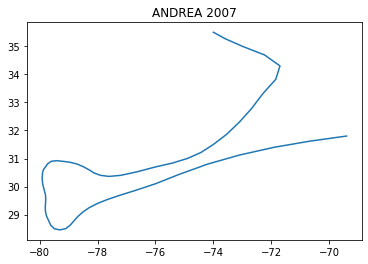

In [11]:
import matplotlib.pyplot as plt

this_storm = andrea.where(andrea.season==2007, drop=True).squeeze()

## track of this storm 
plt.plot(this_storm.lon, this_storm.lat)
plt.title(str(this_storm.name.astype(str).values)+" "+str(int(this_storm.season.values)))

In [12]:
### the storm names are encoded weirdly, need to convert to string:
str(this_storm.name.astype(str).values)

'ANDREA'

In [13]:
### and the season is a float, so change to int and then to string
str(int(this_storm.season.values))

'2007'